In [1]:
import sys
sys.path.append('./../')

import xml.etree.ElementTree as ET
import numpy as np
import ikamoana as ika
import xarray as xr
import matplotlib.pyplot as plt
import os
import parcels

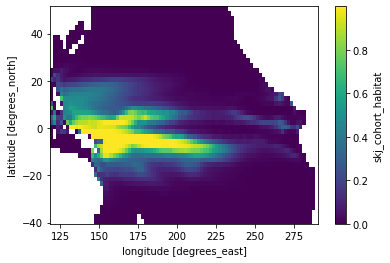

In [2]:
fh = xr.load_dataarray("./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
fh.mean(axis=0).plot()

In [3]:
ika_s = ika.IkaSim('./../data/ikamoana_config/IkaSim_Example_OLD.xml')
f_g = ika_s.generateForcing(from_habitat=fh, to_file=False)

 It will also add +1 to sigma_min. Cf. function documentation for more details.


In [4]:
advection_x_ika = ika_s.forcing['Tx'] + ika_s.forcing['U']
advection_y_ika = ika_s.forcing['Ty'] + ika_s.forcing['V']
diffusion_ika = ika_s.forcing['Ky']

In [5]:
ika_s.forcing.keys()

dict_keys(['H', 'landmask', 'Kx', 'Ky', 'dKx_dx', 'dKy_dy', 'Tx', 'Ty', 'U', 'V', 'F'])

In [6]:
advection_x_sea = xr.load_dataarray("./../data/Inna/skj_cohort_advection_x_20080115-20100715.nc")
advection_y_sea = xr.load_dataarray("./../data/Inna/skj_cohort_advection_y_20080115-20100715.nc")
diffusion_sea = xr.load_dataarray("./../data/Inna/skj_cohort_diffusion_20080115-20100715.nc")

advection_x_sea = advection_x_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]
advection_y_sea = advection_y_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]
diffusion_sea = diffusion_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]

In [7]:
print("MEAN :")
print(np.abs(advection_x_sea).mean().data)
print(np.abs(advection_y_sea).mean().data)
print(np.abs(diffusion_sea).mean().data)
print("MAX :")
print(np.abs(advection_x_sea).max().data)
print(np.abs(advection_y_sea).max().data)
print(np.abs(diffusion_sea).max().data)

MEAN :
50.6767
21.96707
8179.169
MAX :
781.8937
308.0166
15095.813


In [8]:
print("MEAN :")
print(np.abs(advection_x_ika).mean().data)
print(np.abs(advection_y_ika).mean().data)
print(np.abs(diffusion_ika).mean().data)
print("MAX :")
print(np.abs(advection_x_ika).max().data)
print(np.abs(advection_y_ika).max().data)
print(np.abs(diffusion_ika).max().data)

MEAN :
77.60501
29.860132
8046.398
MAX :
1139.9916
471.38016
15099.195


In [9]:
ika_s.forcing_gen.ikamoana_fields_structure.timestep

2592000.0

---

# ADVECTION X

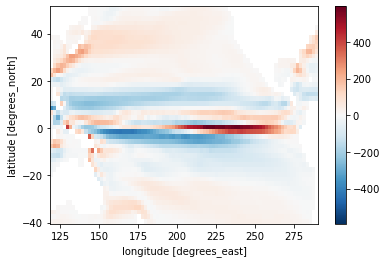

In [10]:
advection_x_ika.mean(axis=0).plot()

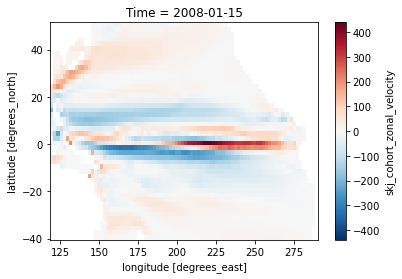

In [11]:
advection_x_sea.mean(axis=0).plot()

> Differences are probably due to SEAPODYM use of 3 layers instead of 1.

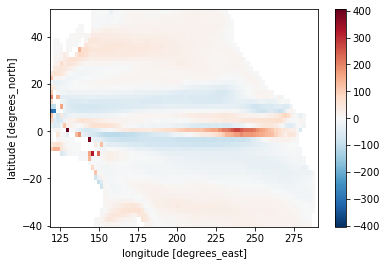

In [12]:
tmp_res = advection_x_ika - advection_x_sea.data
tmp_res.mean(axis=0).plot()

---
# ADVECTION Y

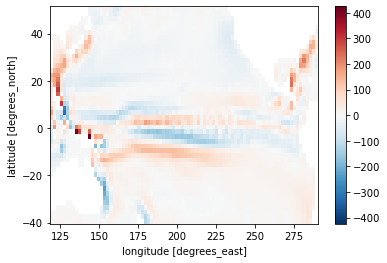

In [13]:
advection_y_ika.mean(axis=0).plot()

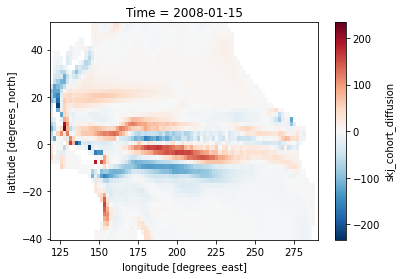

In [14]:
advection_y_sea.mean(axis=0).plot()

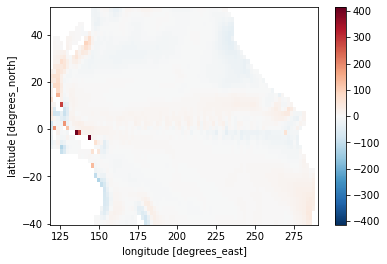

In [15]:
tmp_res = advection_y_ika + advection_y_sea.data
tmp_res.mean(axis=0).plot()

---
# DIFFUSION

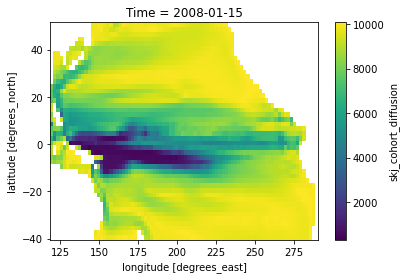

In [16]:
diffusion_sea.mean(axis=0).plot()

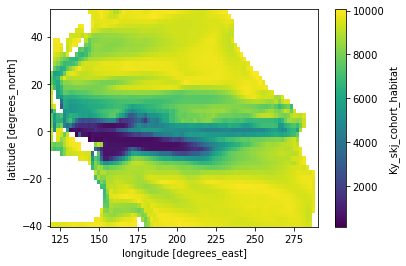

In [17]:
diffusion_ika.mean(axis=0).plot()

In [18]:
coef = (30*24*60*60/1852)

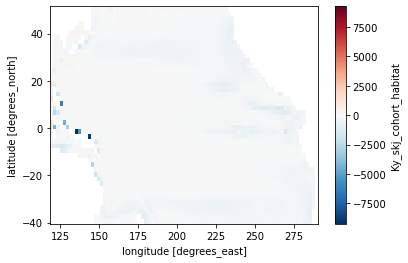

In [19]:
tmp_res = diffusion_ika- diffusion_sea.data
tmp_res.mean(axis=0).plot()